In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
#using pandas library and 'read_csv' function to read csv file as file already formated for us from Kaggle
list = pd.read_csv('listings.csv')

In [16]:
#examing head csv file 
list.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,10/10/2015,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,10/19/2019,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,9/29/2019,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,11/6/2019,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,10/16/2019,1.71,39,324


In [13]:
#display all informations of my data frame
list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20428 entries, 0 to 20427
Data columns (total 16 columns):
id                                20428 non-null int64
name                              20413 non-null object
host_id                           20428 non-null int64
host_name                         20411 non-null object
neighbourhood_group               20428 non-null object
neighbourhood                     20428 non-null object
latitude                          20428 non-null float64
longitude                         20428 non-null float64
room_type                         20428 non-null object
price                             20428 non-null int64
minimum_nights                    20428 non-null int64
number_of_reviews                 20428 non-null int64
last_review                       16152 non-null object
reviews_per_month                 16152 non-null float64
calculated_host_listings_count    20428 non-null int64
availability_365                  20428 non-null int64

In [14]:
#checking amount of rows in given dataset to understand the size we are working with
len(list)

20428

In [15]:
#checking type of every column in the dataset
list.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

# Understadning & Cleaning Data

In [17]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
list.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4276
reviews_per_month                 4276
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Let's proceed with removing columns 
that are not important and handling of missing data.

In [18]:
list.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [20]:
##Display the new dataframe
list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20428 entries, 0 to 20427
Data columns (total 13 columns):
name                              20413 non-null object
host_id                           20428 non-null int64
neighbourhood_group               20428 non-null object
neighbourhood                     20428 non-null object
latitude                          20428 non-null float64
longitude                         20428 non-null float64
room_type                         20428 non-null object
price                             20428 non-null int64
minimum_nights                    20428 non-null int64
number_of_reviews                 20428 non-null int64
reviews_per_month                 16152 non-null float64
calculated_host_listings_count    20428 non-null int64
availability_365                  20428 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 2.0+ MB


In [21]:
#replacing all NaN values in 'reviews_per_month' with 0
list.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
list.reviews_per_month.isnull().sum()

0

In [34]:
#proceedind with exploring some interesting categorical unique values
list.neighbourhood_group.unique()
list.neighbourhood_group.value_counts()

Eixample               6719
Ciutat Vella           4943
Sants-Montjuïc         2363
Sant Martí             2174
Gràcia                 1771
Sarrià-Sant Gervasi     757
Horta-Guinardó          674
Les Corts               421
Sant Andreu             354
Nou Barris              252
Name: neighbourhood_group, dtype: int64

In [23]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
list.neighbourhood.unique()

array(["el Camp de l'Arpa del Clot", 'la Sagrada Família',
       'el Besòs i el Maresme', 'la Vila de Gràcia',
       "el Camp d'en Grassot i Gràcia Nova", 'les Corts',
       'el Barri Gòtic', "l'Antiga Esquerra de l'Eixample",
       'la Barceloneta', "la Dreta de l'Eixample",
       'Sant Pere, Santa Caterina i la Ribera', 'el Poble Sec',
       'el Fort Pienc', 'el Raval', 'Vallcarca i els Penitents',
       'el Poblenou', 'el Clot', 'Sant Antoni',
       'Vallvidrera, el Tibidabo i les Planes', 'Sants',
       'Diagonal Mar i el Front Marítim del Poblenou', 'Pedralbes',
       'el Guinardó', 'Sant Andreu', 'Provençals del Poblenou', 'Horta',
       'la Salut', 'Sant Gervasi - Galvany', 'Sant Martí de Provençals',
       "la Nova Esquerra de l'Eixample", 'Sarrià', 'el Coll',
       'la Vila Olímpica del Poblenou', 'Hostafrancs',
       'el Parc i la Llacuna del Poblenou', 'la Bordeta',
       'Vilapicina i la Torre Llobeta', 'la Font de la Guatlla',
       'el Putxet i el Farró', 

In [24]:
#examining the unique values of room_type as this column will appear very handy for later analysis
list.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [30]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host = list.host_id.value_counts().head(15)
top_host

102947901    155
170716140    154
4459553      140
158023606    128
171236207    114
193618270    104
396363        99
36607755      98
1447144       90
1391607       88
1503151       83
32037490      77
157250994     69
299462        69
10704         68
Name: host_id, dtype: int64

In [69]:
#confirming our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check = list.calculated_host_listings_count.max()
top_host_check

155

In [70]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(15,8)})

[Text(0, 0, '102947901'),
 Text(0, 0, '170716140'),
 Text(0, 0, '4459553'),
 Text(0, 0, '158023606'),
 Text(0, 0, '171236207'),
 Text(0, 0, '193618270'),
 Text(0, 0, '396363'),
 Text(0, 0, '36607755'),
 Text(0, 0, '1447144'),
 Text(0, 0, '1391607'),
 Text(0, 0, '1503151'),
 Text(0, 0, '32037490'),
 Text(0, 0, '157250994'),
 Text(0, 0, '299462'),
 Text(0, 0, '10704')]

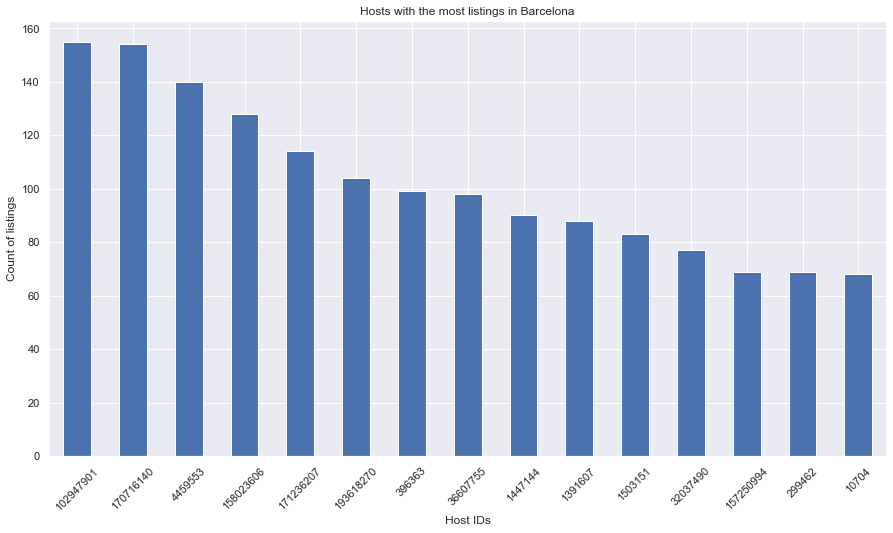

In [71]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in Barcelona')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [72]:
#let's find out more about our neiberhoods presented 
#Eixample
sub_1=list.loc[list['neighbourhood_group'] == 'Eixample']
price_sub1=sub_1[['price']]
#Sant Martí
sub_2=list.loc[list['neighbourhood_group'] == 'Sant Martí']
price_sub2=sub_2[['price']]
#Gràcia
sub_3=list.loc[list['neighbourhood_group'] == 'Gràcia']
price_sub3=sub_3[['price']]
#Les Corts
sub_4=list.loc[list['neighbourhood_group'] == 'Les Corts']
price_sub4=sub_4[['price']]
#Ciutat Vella
sub_5=list.loc[list['neighbourhood_group'] == 'Ciutat Vella']
price_sub5=sub_5[['price']]
#Sants-Montjuïc
sub_6=list.loc[list['neighbourhood_group'] == 'Sants-Montjuïc']
price_sub6=sub_6[['price']]
#Sarrià-Sant Gervasi
sub_7=list.loc[list['neighbourhood_group'] == 'Sarrià-Sant Gervasi']
price_sub7=sub_7[['price']]
##Horta-Guinardó
sub_8=list.loc[list['neighbourhood_group'] == 'Horta-Guinardó']
price_sub8=sub_8[['price']]
#Sant Andreu
sub_9=list.loc[list['neighbourhood_group'] == 'Sant Andreu']
price_sub9=sub_9[['price']]
#Nou Barris
sub_10=list.loc[list['neighbourhood_group'] == 'Nou Barris']
price_sub10=sub_10[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5, price_sub6, price_sub7, price_sub8, price_sub9, price_sub10]

In [74]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Eixample', 'Sant Martí', 'Gràcia', 'Les Corts', 'Ciutat Vella', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Horta-Guinardó', 'Sant Andreu' 'Nou Barris']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[9:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
p_l_b_n_2[5].rename(columns={'price':nei_list[5]}, inplace=True)
p_l_b_n_2[6].rename(columns={'price':nei_list[6]}, inplace=True)
p_l_b_n_2[7].rename(columns={'price':nei_list[7]}, inplace=True)
p_l_b_n_2[8].rename(columns={'price':nei_list[8]}, inplace=True)
p_l_b_n_2[9].rename(columns={'price':nei_list[9]}, inplace=True)
p_l_b_n_2[10].rename(columns={'price':nei_list[10]}, inplace=True)

p_l_b_n_2

[Empty DataFrame
 Columns: [Stats, Eixample]
 Index: [], Empty DataFrame
 Columns: [Stats, Sant Martí]
 Index: [], Empty DataFrame
 Columns: [Stats, Gràcia]
 Index: [], Empty DataFrame
 Columns: [Stats, Les Corts]
 Index: [], Empty DataFrame
 Columns: [Stats, Ciutat Vella]
 Index: [], Empty DataFrame
 Columns: [Stats, Sants-Montjuïc]
 Index: [], Empty DataFrame
 Columns: [Stats, Sarrià-Sant Gervasi]
 Index: [], Empty DataFrame
 Columns: [Stats, Horta-Guinardó]
 Index: [], Empty DataFrame
 Columns: [Stats, Sant AndreuNou Barris]
 Index: [], Empty DataFrame
 Columns: [Stats, price]
 Index: []]

In [68]:
list.loc[list['neighbourhood_group'] == 'Sant Andreu']

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
74,Room for rent in BCN/ non smoker,859557,Sant Andreu,Sant Andreu,41.43484,2.19234,Private room,20,10,6,0.06,1,98
272,Lovely Penthouse in Barcelona,2517389,Sant Andreu,el Congrés i els Indians,41.42255,2.18061,Entire home/apt,140,3,23,0.30,2,68
328,COMFORTABLE AND VERY SPACIOUS LARGE,2751629,Sant Andreu,Navas,41.41758,2.18742,Private room,20,1,21,0.27,1,354
770,Habitación y terraza soleada,5583741,Sant Andreu,la Sagrera,41.42239,2.18914,Private room,30,2,254,3.20,2,353
859,Beautiful bright single room,5583741,Sant Andreu,la Sagrera,41.42374,2.18778,Private room,30,2,254,3.48,2,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19785,Cozy Bedroom in New Flat,303599287,Sant Andreu,Navas,41.41913,2.18366,Private room,20,2,1,1.00,1,57
19909,Quarto doble localizado en La Segrega.,304379004,Sant Andreu,la Sagrera,41.42443,2.18505,Private room,65,2,0,0.00,1,43
20101,Habitación en Barcelona muy soleada,305466376,Sant Andreu,Sant Andreu,41.43495,2.19107,Private room,35,2,0,0.00,1,9
20248,Habitación al lado de una parada de metro,306827496,Sant Andreu,Sant Andreu,41.43516,2.19279,Private room,50,1,0,0.00,1,10
